In [1]:
from MLP_GRU import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import sys
import os
from IPython.display import clear_output

In [2]:
# load model
file_path = os.getcwd()
model_path = file_path + r'/result_20240905.pt'
# model_path = r'D:\vscode_workspace\Python\SparseStepCountsDataInference\models\MLP_GRU\result.pt'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_state_dict = torch.load(model_path, map_location=device)
model = MLP_GRU(input_size=1, gru_hidden_size=64, mlp_hidden_size=256, mlp_layer=1, output_size=70, use_gpu=True,
                      device=0, output_last=True)
model.load_state_dict(model_state_dict)
model.to(device)

MLP_GRU(
  (gamma_x_l): Linear(in_features=256, out_features=1, bias=True)
  (gru_cell): GRUCell(2, 64)
  (mlp_model): Sequential(
    (0): Linear(in_features=3, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc): Linear(in_features=64, out_features=70, bias=True)
)

In [3]:
if 0:
    # load data
    root_path = "../../StepCountsDataset/"
    granularity = 3
    final_train_labels, test_labels, train_x, test_x, raw_train_x, raw_test_x = prepare_mixed_data_granularity(root_path, granularity)
    train_loader, test_loader = prepare_train_test_data(train_data=train_x,
                                                        test_data=test_x,
                                                        train_labels=final_train_labels,
                                                        test_labels=test_labels,
                                                        raw_train_data=raw_train_x,
                                                        raw_test_data=raw_test_x,
                                                        batch_size=100)
    correct_pred = 0
    total_num = 0
    model.eval()
    for data, label, raw_data in tqdm(test_loader):
        data = data.to(device)
        label = label.to(device)
        raw_data = raw_data.to(device)
        output, _ = model(data)
        correct_pred += (label == output.argmax(1)).sum().item()
        total_num += label.size(0)
    print("correct_pred: ", correct_pred)
    print("total_num: ", total_num)
    print("Train Accuracy: ", correct_pred / total_num)

index: 14
label: 21
output: 23


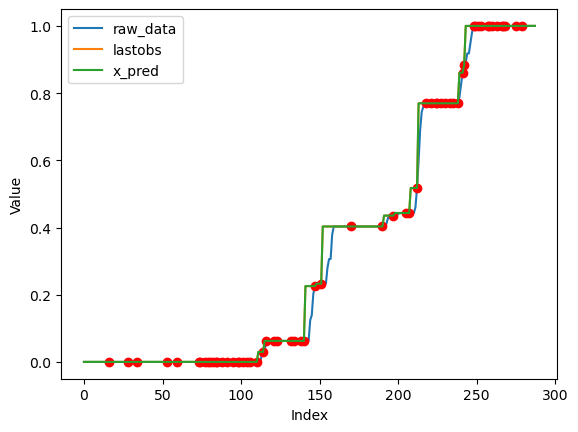

  0%|          | 0/34 [00:11<?, ?it/s]


In [4]:
model.eval()
# retain_number=[[278,283],[268,278],[238,268],[188,238],[138,188],[5,10]]
retain_number=[[188,238]]
root_path = "../../StepCountsDataset/"
granularity = 3
final_train_labels, test_labels, train_x, test_x, raw_train_x, raw_test_x = prepare_mixed_data_granularity(root_path, granularity, retain_number=retain_number)
train_loader, test_loader = prepare_train_test_data(train_data=train_x,
                                                    test_data=test_x,
                                                    train_labels=final_train_labels,
                                                    test_labels=test_labels,
                                                    raw_train_data=raw_train_x,
                                                    raw_test_data=raw_test_x,
                                                    batch_size=100)
index = 0
data_iter = iter(test_loader)
for data, label, raw_data in tqdm(data_iter):
    data = data.to(device)
    label = label.to(device)
    raw_data = raw_data.to(device)
    output, x_pred = model(data)
    for i in range(output.shape[0]):
        clear_output()
        print("index: ", index, '\n', "label: ", label[i].item(), '\n', "output: ", output[i].argmax(0).item(), sep='')
        index += 1
        # Plot
        plt.plot(raw_data[i, :].detach().cpu().numpy(), label='raw_data')
        plt.plot(data[i, 4, :, 0].detach().cpu().numpy(), label='lastobs')
        # plot data points
        mask = data[i, 0, :, 0].cpu().numpy()
        data_points = [(j, data[i, 1, j, 0].item()) for j in range(len(mask)) if mask[j] != -1.]
        for point in data_points:
            plt.plot(point[0], point[1], 'ro') 
        # plt.plot(data_points, label='data')
        plt.plot(x_pred[i].detach().cpu().numpy(), label='x_pred')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

        quit_flag = input("Press [enter] to continue.")
        if quit_flag != "":
            break
    if quit_flag != "":
        break